In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Sky coordinates

There are several coordinate systems to express the position of an object in the sky. See more at: https://en.wikipedia.org/wiki/Celestial_coordinate_system

* [Equatorial/celestial](https://en.wikipedia.org/wiki/Equatorial_coordinate_system): This one is the coordinate system that we are going to use more often. The position of the objects are given but a couple of numbers: right ascension (RA -- longitude, $\alpha$), and declination (Dec -- latitude, $\delta$). The equatorial plane is located at the celestial equator (i.e., the projection of the Earth's equator) and the zero longitude mark is aligned with the vernal equinox. It is usually centered in Earth's center and since Earth's vernal equinox changes position (due to nutation, etc.) we usually use an epoch to fix the equinox. The most common is J2000 (i.e., the equinox in the year 2000).

* [Galactic](https://en.wikipedia.org/wiki/Galactic_coordinate_system): This coordinate system is also widely used in astronomy, especially in the case of Cosmic Microwave Background experiments. The position of any point in the sky is also given by two points: Galactic longitude ($l$) and galactic latitude ($b$). The equatorial plane corresponds to the galactic plane. The zero longitude corresponds to the position of the galactic center.

* There are other coordinate systems but we are going to use mostly these two.

## Practical coding

Let's try to use the most typical operations that we use starting from reading and writing data

In [2]:
# E.g., write/read a table with data
min_x = 0 #Let's assume this is right ascension
max_x = 360
nsamples = 10000
min_y = -90 #Let's assume this is declination
max_y = 90
rnd_x = min_x+(max_x-min_x)*np.random.random(size=nsamples)
rnd_y = np.degrees(np.arcsin(np.sin(np.radians(min_y))+(np.sin(np.radians(max_y))-np.sin(np.radians(min_y)))*np.random.random(size=nsamples)))


We now have a couple of arrays that we can save in many, many ways (numpy arrays, ASCII files...) Data scientists like to use `pandas`. It is a convenient and powerful tool to read and write in multiple formats.

## Reading/Writing data

In [3]:
import pandas as pd

In [4]:
df = pd.DataFrame({'x': rnd_x, 'y': rnd_y})

In [5]:
df

,x,y
0,11.006866,-48.385056
1,327.660621,60.503543
2,194.414382,-38.063870
3,296.958962,-77.316550
4,205.959139,45.554700
...,...,...
9995,124.237228,67.258401
9996,328.468683,-7.615533
9997,343.710482,67.181625
9998,313.075176,23.498947


Astronomers however like the [`FITS`](https://docs.astropy.org/en/stable/io/fits/) format and we use a library called `astropy` to read/write them. In particular, since this is a data table we are going to use `astropy.table`.

In [6]:
import astropy.table

In [7]:
tab = astropy.table.Table.from_pandas(df) # We can create it from a pandas dataframe

In [8]:
tab_from_dict = astropy.table.Table({'x': rnd_x, 'y':rnd_y}) # From a dictionary

In [9]:
tab_from_dict == tab

array([ True,  True,  True, ...,  True,  True,  True])

In [10]:
tab_from_arrays = astropy.table.Table([rnd_x, rnd_y], names=('x', 'y')) # Or from arrays

In [11]:
tab_from_arrays == tab

array([ True,  True,  True, ...,  True,  True,  True])

In [12]:
tab.write('test_table.fits', overwrite=True) # So now we write the table

There are many formats available using `astropy`

In [13]:
?tab.write

Signature:   tab.write(*args, serialize_method=None, **kwargs)
Type:        TableWrite
String form: <astropy.table.connect.TableWrite object at 0x1178974e0>
File:        //anaconda3/lib/python3.7/site-packages/astropy/table/connect.py
Docstring:  
Write this Table object out in the specified format.

This function provides the Table interface to the astropy unified I/O
layer.  This allows easily writing a file in many supported data formats
using syntax such as::

  >>> from astropy.table import Table
  >>> dat = Table([[1, 2], [3, 4]], names=('a', 'b'))
  >>> dat.write('table.dat', format='ascii')

Get help on the available writers for ``Table`` using the``help()`` method::

  >>> Table.write.help()  # Get help writing Table and list supported formats
  >>> Table.write.help('fits')  # Get detailed help on Table FITS writer
  >>> Table.write.list_formats()  # Print list of available formats

The ``serialize_method`` argument is explained in the section on
`Table serialization methods
<

Let's see how we can read a table

In [14]:
tab_read = astropy.table.Table.read('test_table.fits')

If the format of the table is not `FITS` we have to specify the format, e.g.:

`tab_read = astropy.table.Table.read('test_table.txt', format='ascii')`

## Plot data

Data visualization is very important since it allows us to understand them and think of useful ways in how to manipulate the data to obtain more information or to try to compress the information somehow. Let's try to represent our dataset.

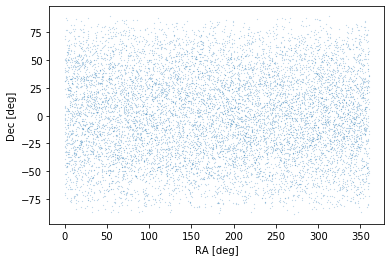

In [15]:
#Typical plots: plt.plot, plt.hist, plt.hist2d, plt.scatter
plt.scatter(rnd_x, rnd_y, s=0.01)
plt.xlabel('RA [deg]')
plt.ylabel('Dec [deg]');

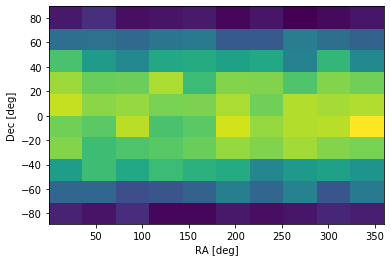

In [16]:
plt.hist2d(rnd_x, rnd_y);
plt.xlabel('RA [deg]')
plt.ylabel('Dec [deg]');

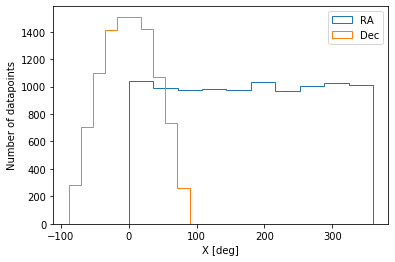

In [17]:
plt.hist(rnd_x, histtype='step', label='RA')
plt.hist(rnd_y, histtype='step', label='Dec')
plt.xlabel('X [deg]')
plt.ylabel('Number of datapoints')
plt.legend(loc='best')

There are multiple tools to visualize data! Check for example `seaborn`. And there are even interactive tools like `bokeh`

## Sky map representation (optional)

In [18]:
import healpy as hp

[`healpy`](https://healpy.readthedocs.io/en/latest/) is a library that allows to decompose the sky (tesellate) in equal area cells. It is pretty widely used in the cosmology community and there are some nice mathematical properties about that particular way of breaking the sky into pieces but for the purposes of this notebook we are going to just use it as a tool to make 2D histograms of the sky

In [19]:
nside = 64 # This parameter (which should be a power of 2) controls the resolution of the map, the bigger the number, the smaller the pixels
print(hp.nside2resol(nside, arcmin=True)) # This is the pixel resolution in arcminutes
pixel_numbers = hp.ang2pix(nside, rnd_x, rnd_y, lonlat=True) # This function tells us the number of pixel that corresponds to each pair x, y. We use the lonlat=True option to pass them as RA, Dec

54.967782589078496


In [20]:
print(pixel_numbers) 

[42998  3265 39690 ...  1978 14942 33033]


Now we have a bunch of pixel numbers (one per pair RA, Dec) so we have to count them to see how many pairs are in each cell/pixel

In [21]:
hp_map = np.bincount(pixel_numbers, minlength=hp.nside2npix(nside))

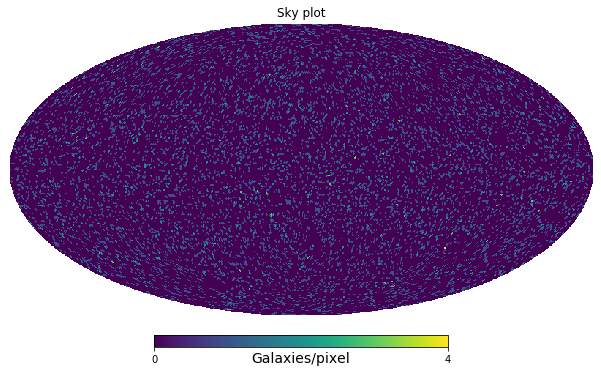

In [22]:
hp.mollview(hp_map, title='Sky plot', unit='Galaxies/pixel')
#Our first sky plot!